Источники: [Яндекс. Лекция 3: «Множества»](https://www.youtube.com/watch?v=PUpmV2ieIHA&list=PL6Wui14DvQPySdPv5NUqV3i8sDbHkCKC5&index=4)

<br>Что такое "Множество?"
<br>Что должно уметь Множество?
<br>Как устроено множество?
<br>Как реализовать множество?

# Множества

- Как устроено множесто?
- Амортизированная сложность
- Примеры задач

## Как устроенно множество

Что должно уметь делать множество:
- добавлять элементы
- проверять наличие / искать элементы
- удолять элементы

Множество - это "контейнер" содержащий уникальные элементы в случайном порядке (порядок не то что бы прям случайный, скорее определяющися внутренней структурой)

--------------------
это неупорядоченная коллекция уникальных объектов/элементов

--------------------
это неупорядоченная коллекция, хранящая набор уникальных значений и поддерживающая для них операции добавления, удаления и определения вхождения.

## Как реализовать (сделать свое) множество

- придумаем функцию, которая сопостовляет каждому элементу, какое либо небольшое число (exp: элемент 37, функция х%10, получаемое небольшое число 7) 
- вычислим функцию от элемента (см пример выше)
- положим элемент в список с номером, равным вычесленному значению функции (exp номер 7)

### Пример функции для добавления числа

- функция - последняя цифра числа Х (т.е. F(X) = X % 10 )
- 137 -> 7, 17 -> 7, 25 -> 5 и так далее!
- положим 137, 17 в список с номером 7, а 25 в список с номером 5

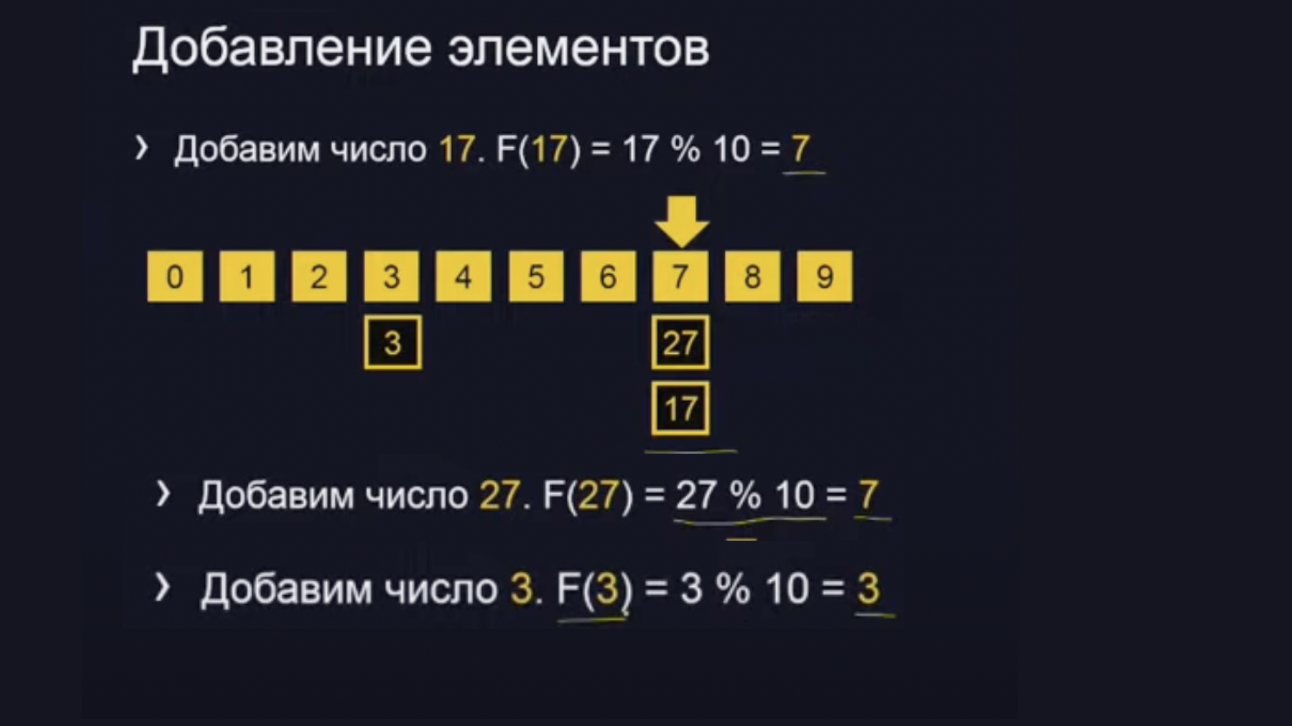

### Как перебрать элементы множества? 
- Если у насть есть множество размером N и в нем храниться K элементов, то мы можем перебрать множестово за N+K операций - O(N+K) 
- мы идем одним циклом по ячейкам множество, если оно пусто пропускаем, если нет, вторым циклом проходимся по списку элементов в ячейке

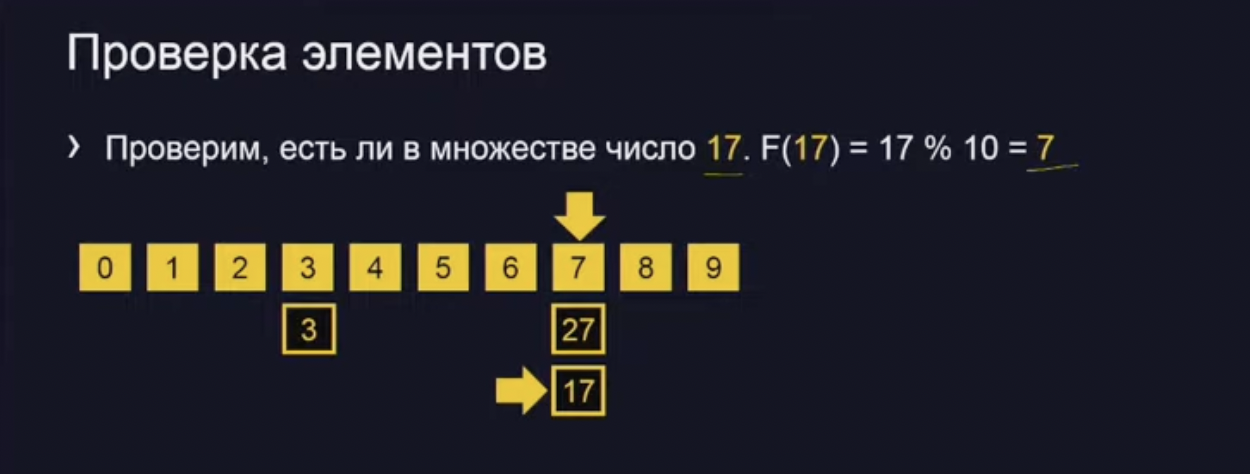

### Удоление элемента

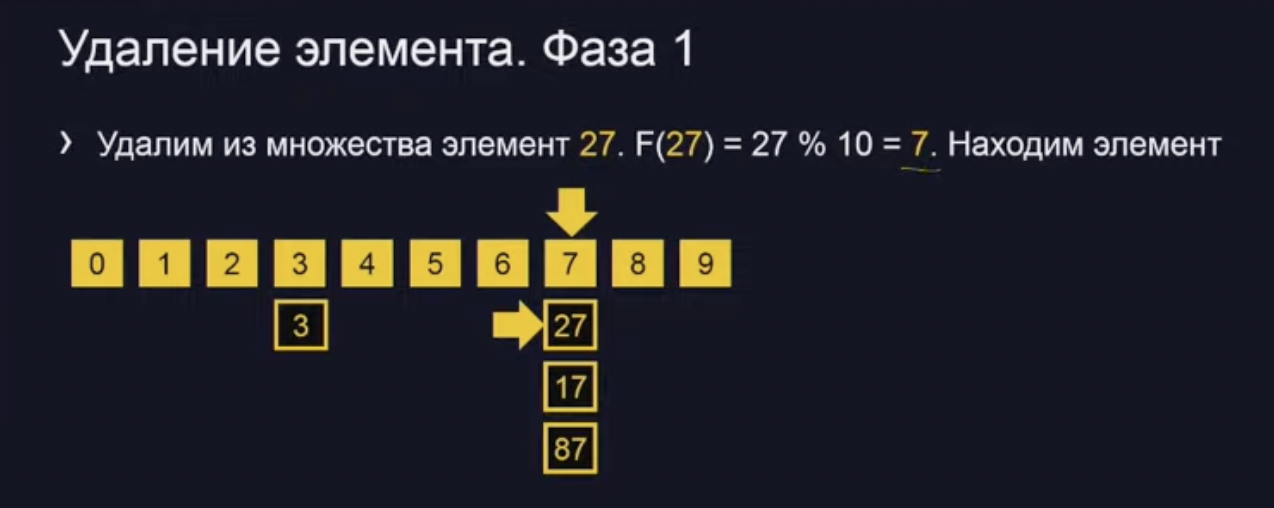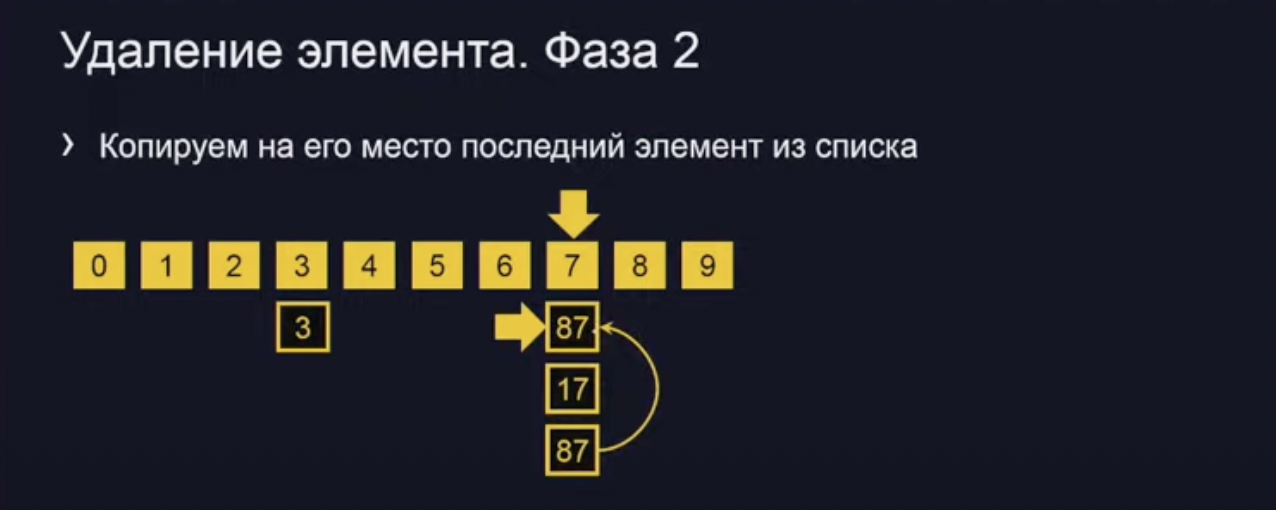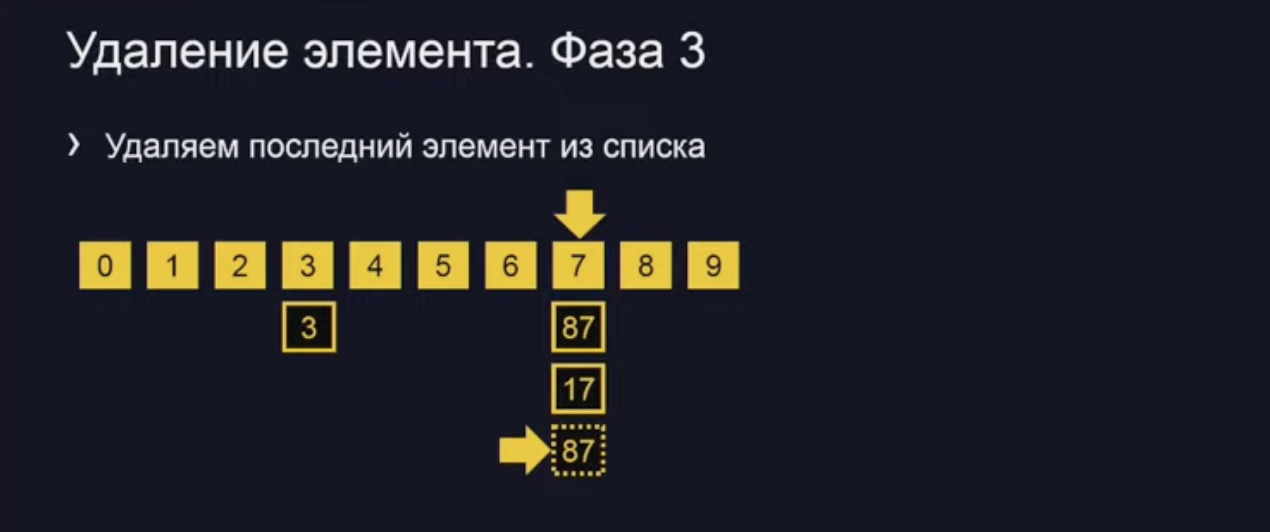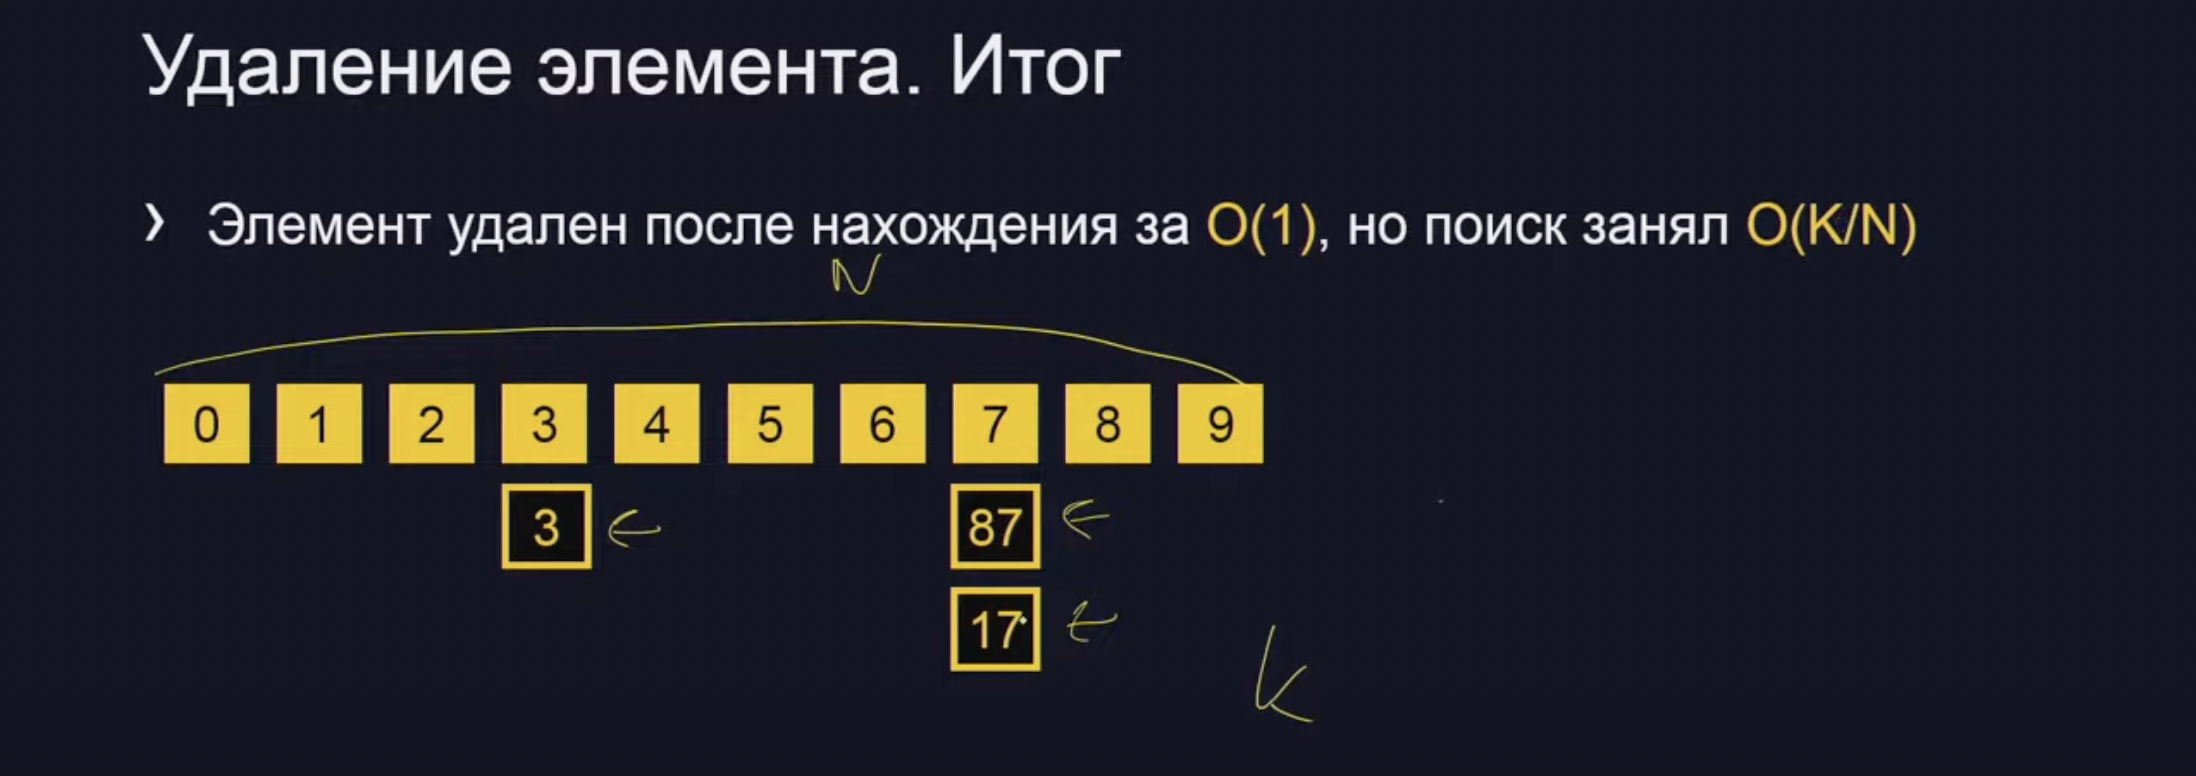

- Находим элемент
- Копируем на его место последний из списка (меняем местами)
- Удоляем последний элемент из списка

### Наша реализация

In [16]:
# могут спрашивать на собеседованиях
set_size = 10
my_set = [[] for _ in range(set_size)]

def add_el(x):
    my_set[x % set_size].append(x)
# x % set_size - наша хэш функция
# [x % set_size] - определяем позицию/ячейку
# .append(x) добавляем х в список ячейки

def find_el(x):
    for el in my_set[x % set_size]:
        if el == x:
            return True
    return False    

def delete_el(x):
    _list = my_set[x % set_size]
    for i, el in enumerate(_list):
        if el == x:
            _list[i],_list[-1] = _list[-1],_list[i]
            # _list[i] = _list[-1]
            _list.pop()
            return
# можно обойтись без свопа, так как .pop() удоляет
# последний элемент списка, а его можно просто
# продублировать на место того, что хотим удолить

Стоит заметить, что мы реализовали МУЛЬТИмножесто, то есть, у нас нет проверки на уникальность элемента, в нашем множестве элементы могут повторяться. 
Как избежать? в add_el(x) можно добавить проверку на наличиче числа find_el(x) и добавлять, толко если оно есть:

<code>
def add_el(x):
    if not find_el(x):
        my_set[x % set_size].append(x)
</code>

### Термины
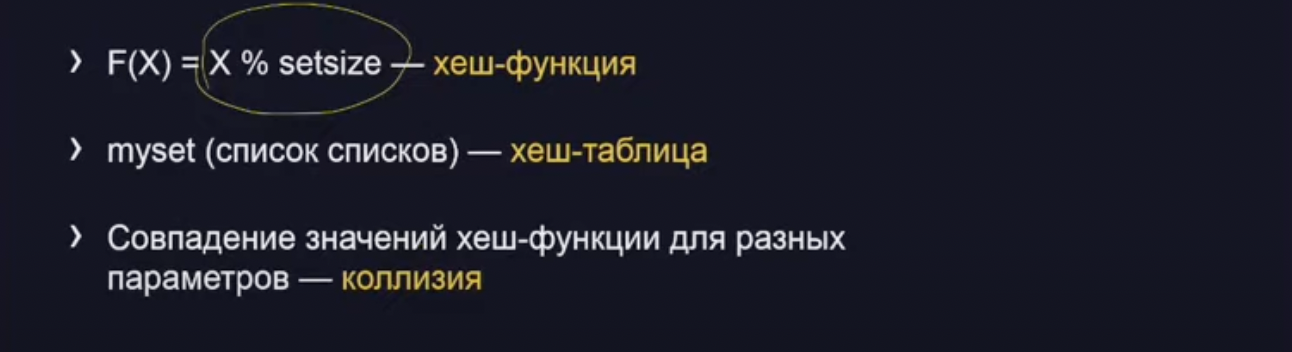

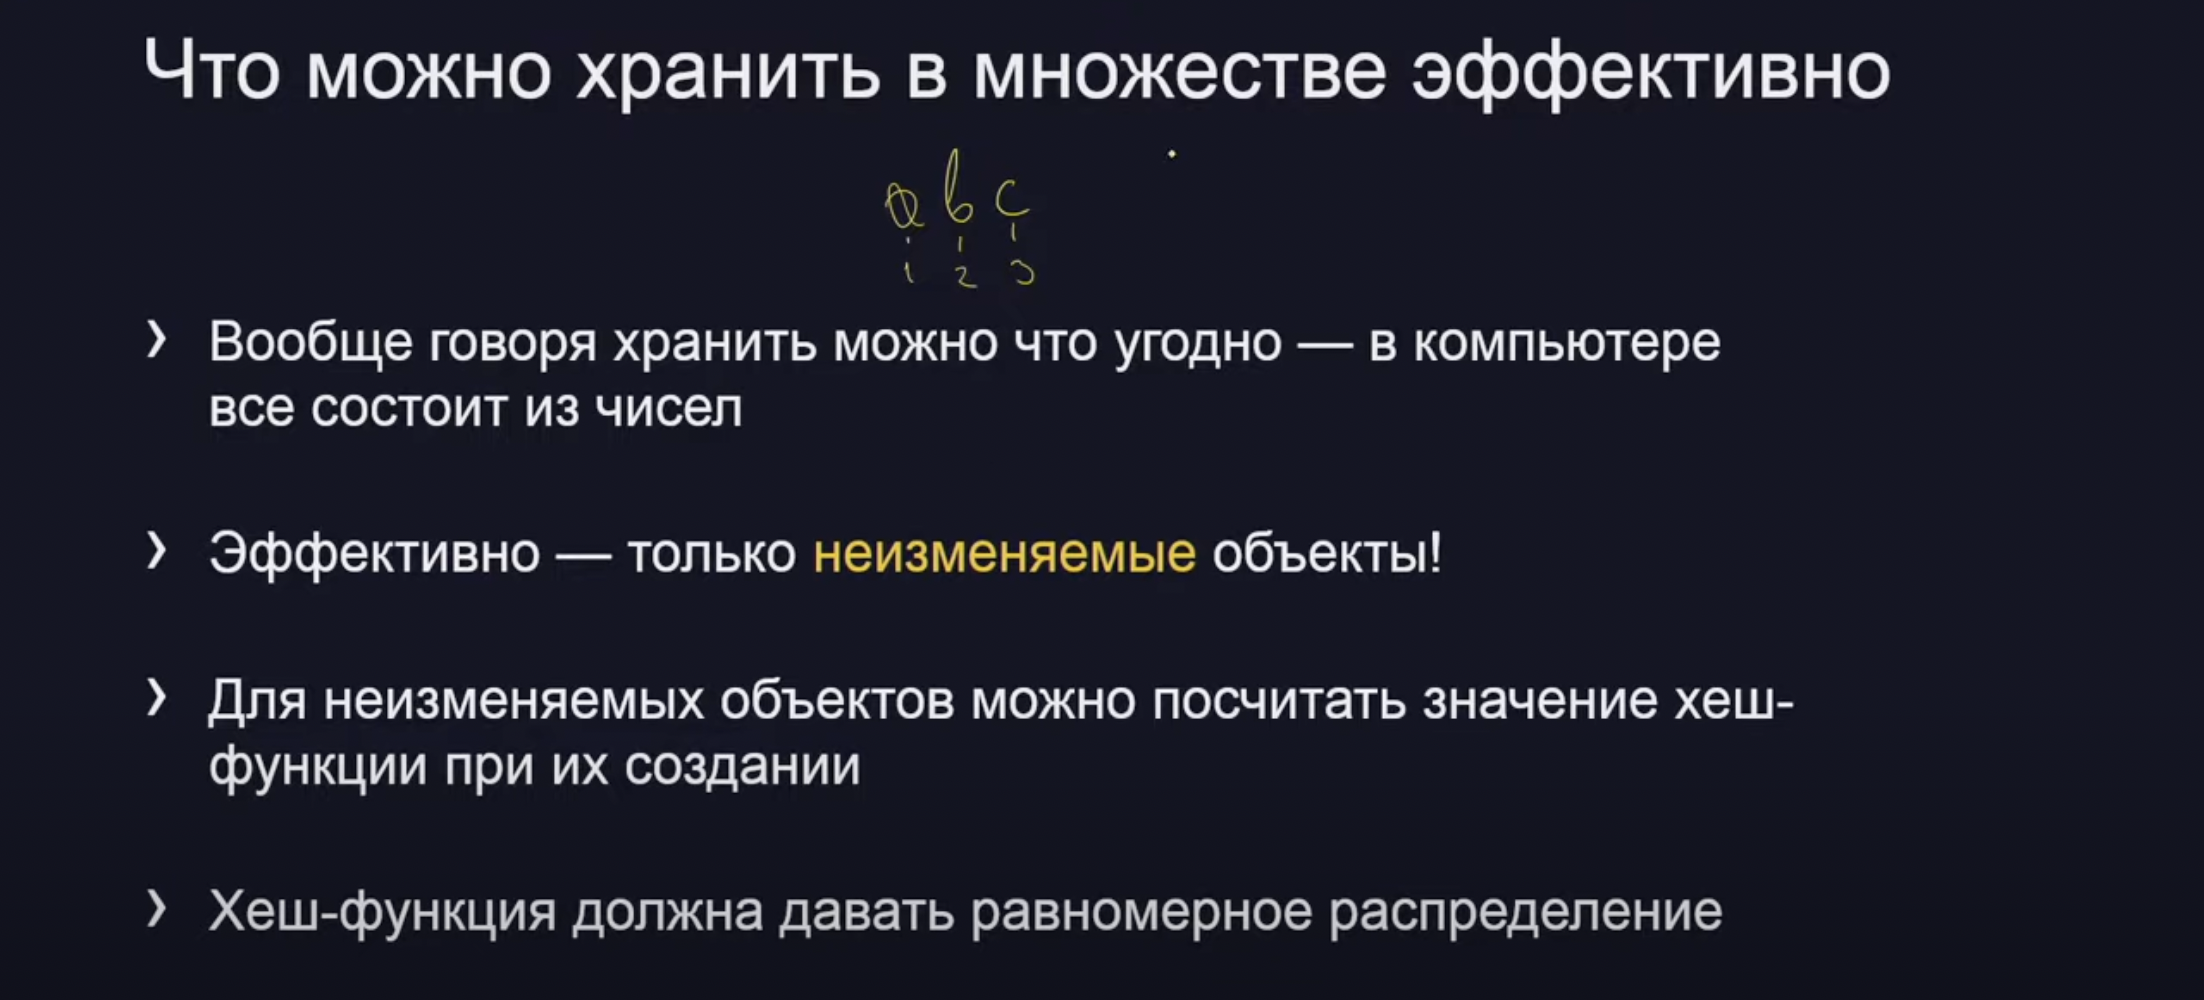

## Амортизированная сложность 

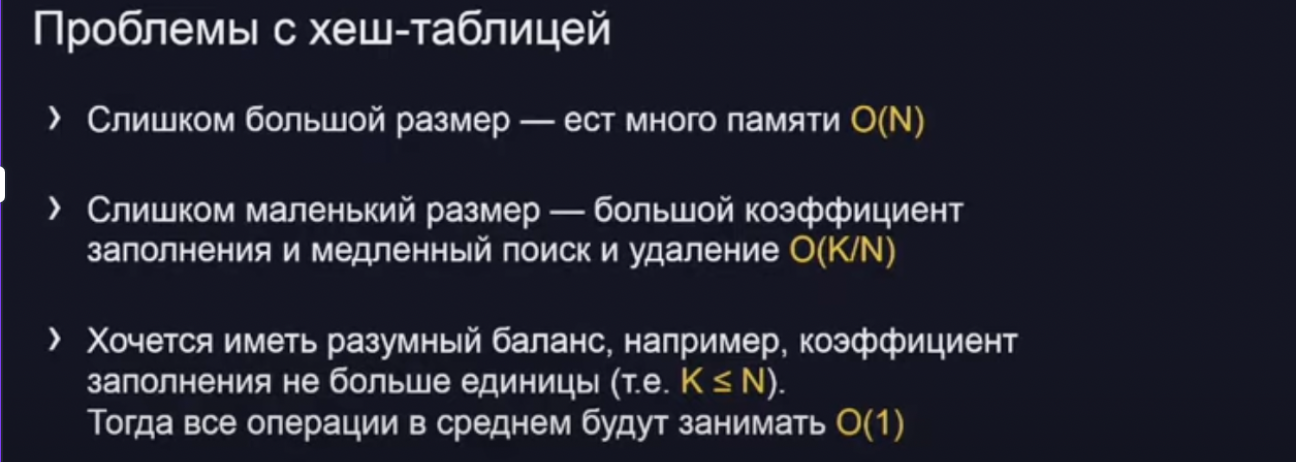

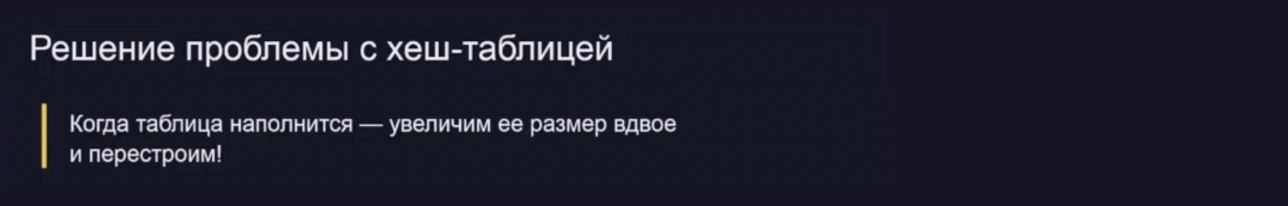

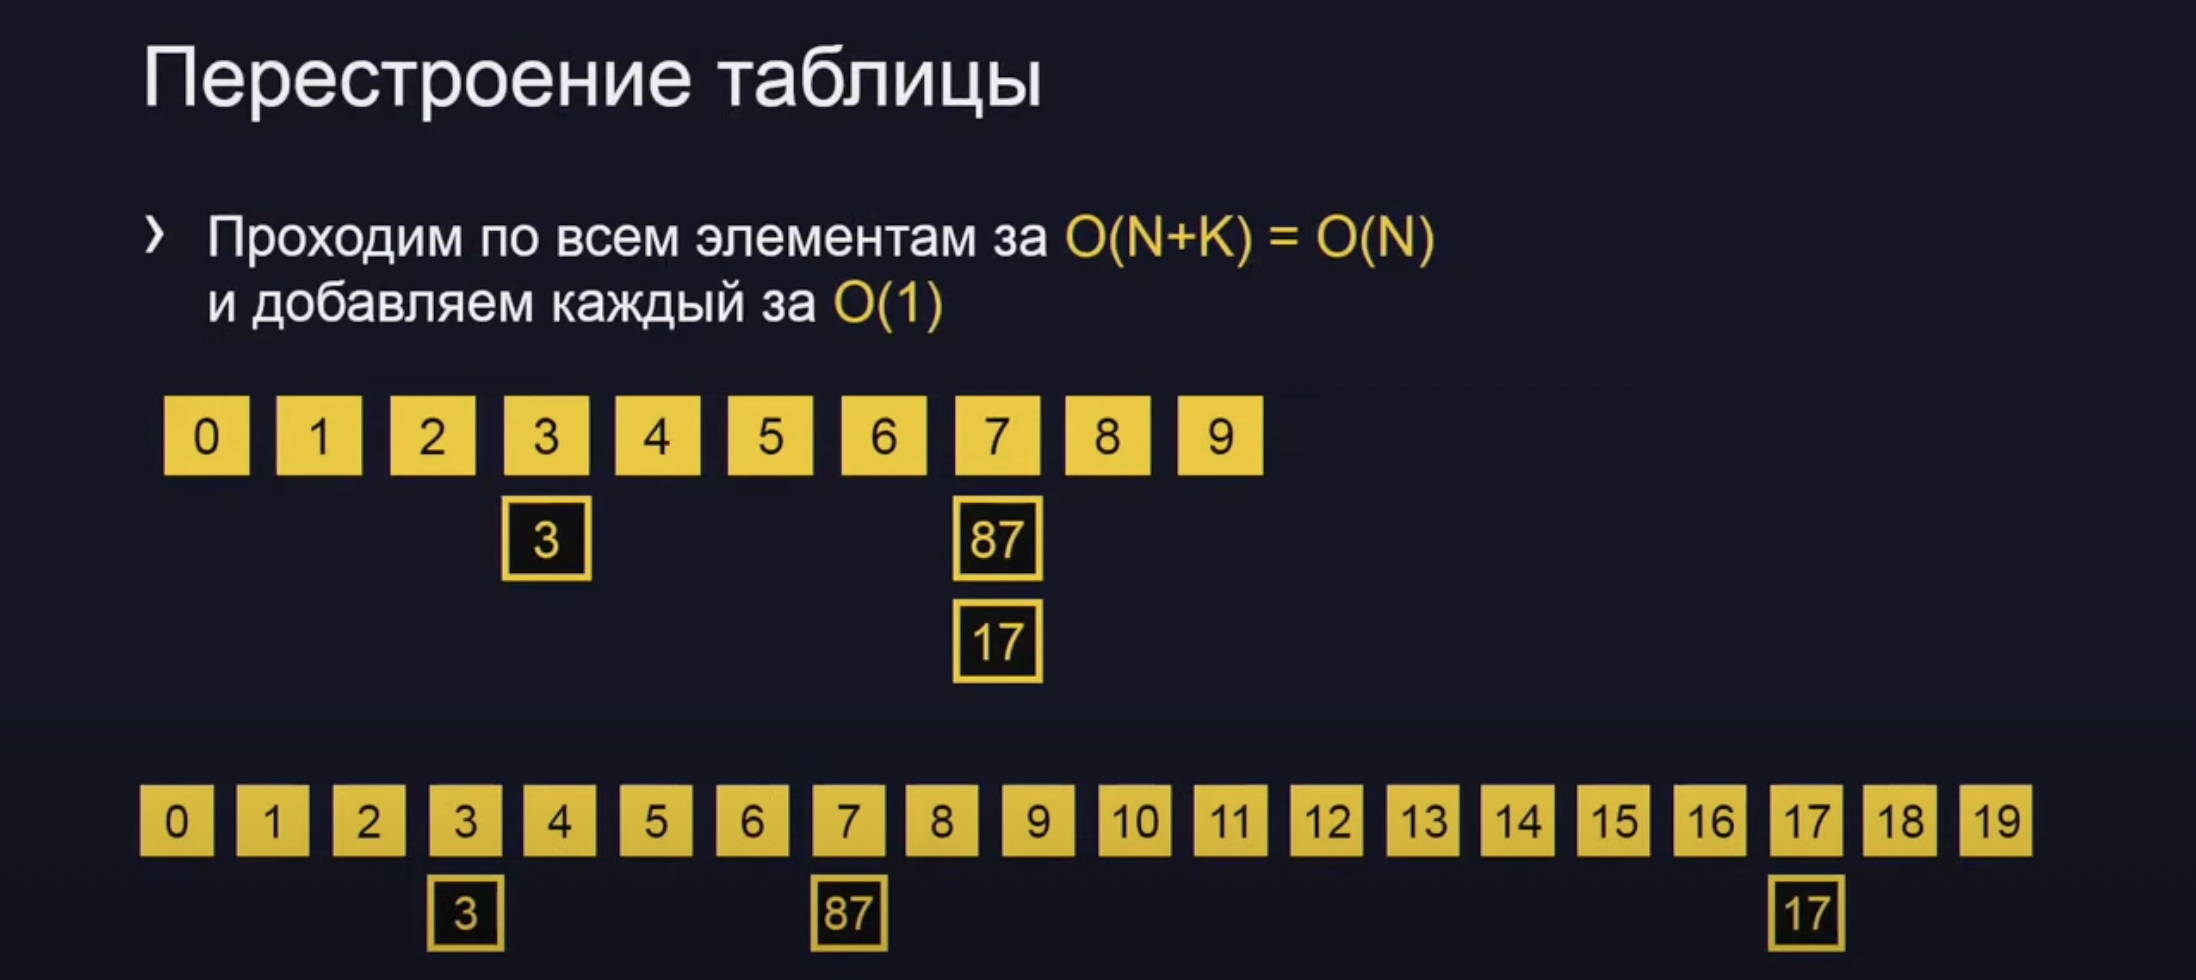

### Сложность добавления N элементов $O(N^2)$?

- возьмем таблицу с начальным размером 1
- будем добавлять $N = 2^p$ элементов
- на каждом (?) шаге может произойти перестроение таблицы за O(N)

### Сложность добавления N элементов $O(N logN)$?

- возьмем таблицу с начальным размером 1
- будем добавлять $N = 2^p$ элементов, т.е. $P=LogN$
- только на P шагах (когда размер таблицы равен очередной степени двойки) может произойти перестроение таблицы за O(N)

### Сложность добавления N элементов O(N)?

- возьмем таблицу с начальным размером 1
- будем добавлять $N = 2^p$ элементов, т.е. $P=LogN$
- 1 + 2 + 4 + 8 + ... + $2^p$ = $2^{p+1} - 1$ = 2N - 1 = O(N) 

### Амортизированная сложность

- амортизированная сложность - среднее время выполнения операции (условно)
- у нас амор-я сложность операции O(1) - всего было N операций и суммарно на это ушло O(N)
- в худшем случаи отдельная операция выполняется за O(N) - может не подходить для систем реального времени

другими словами, если общее время выполнения операций O(N), то среднее время выполнения одной операции составляет O(1), но отдельные операции могут выполнятся так же O(N), если ровно на этой операции произошло расширение таблицы

## Примеры задач

### Задача 1. Найти, числа A+B=X

Дана последовательность положительных числе длиной N и число X

Нужно найти такие два числа A и B из последовательности, что A+B=X. 
Если таковой не имеется, то вернуть 0,0.

In [34]:
seq = [x^7 for x in range(10)]
#  Битовый оператор ^ (исключающее ИЛИ, XOR)
seq

[7, 6, 5, 4, 3, 2, 1, 0, 15, 14]

In [37]:
# Решение за O(N^2)
# Переберем число A за O(N)
# Переберем число B за O(N)
# Если их сумма равна X, то вернем пару
def find_ab(seq, x):
    for i in range(len(seq)):
        for j in range(i+1,len(seq)):
            if seq[i] + seq[j] == x:
                return seq[i], seq[j]
            
    return 0, 0
def find_ab_2(seq, x):
    for el_1 in seq:
        for el_2 in seq[1:]:
            if el_1 + el_2 == x:
                return el_1, el_2
            
    return 0, 0

In [41]:
find_ab_2(seq, 17)

(3, 14)

In [39]:
# Решение за O(N2)
# будем хранить все обработанные числа в множистве
# Переберем числа num, если в множестве есть
# (x - num), то мы нашли пару
def find_ab(seq, x):
    previus = set()
    for num in seq:
        if x - num in previus:
            return num, x - num
        previus.add(num)
    return 0, 0

In [42]:
find_ab(seq, 17)

(15, 2)

### Задача 2. Пропущенная буква, словарь.

Дан словарь из N слов, длина каждого не превосходит K

В записи каждоко из M слов текста (каждое длиной до K) может быть пропущена одна буква. Для каждого слова сказать, входит ли оно (возможно с одной пропущеной буквой), в словарь

In [ ]:
# Решение за O(NK^2 + M)
# Выбросим из каждого слова словаря по букве всеми возможными способами
# за O(NK) и положим получившиеся слова в множества
# Для каждого слова из текста проверим, есть ли оно в словаре
# за O(1)

def words_in_dict(dictionary, text):
    goodwords = set(dictionary)
    for word in dictionary:  # этот перебор выполняется за N
        for del_pos in range(len(word)): # этот перебор за K
            goodwords.add(word[:del_pos]+word[del_pos+1:])
            # это конструирование слова происходит за K
    ans = []
    for word in text:
        ans.append(word in goodwords)
    return ans